Instrucciones para instalar un ambiente para este cuadernillo

```bash
conda create -n astro
conda activate astro
conda install jupyter matplotlib scipy pandas cython
pip install git+git://github.com/phuijse/P4J.git
```

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from os import listdir, makedirs
from os.path import isfile, join, exists
import time

import P4J

data_path = "data/"
ext = "dat"
lc_list = [f for f in sorted(listdir(data_path)) if isfile(join(data_path, f)) and f.endswith(ext)]
N = len(lc_list)

Parsear una curva de luz y calcular su periodograma

In [7]:
idx = 0
print(lc_list[idx])
lcdf = pd.read_table(join(data_path, lc_list[idx]), header=None, delim_whitespace=True)
mjd, mag, err, fla = lcdf.values.T

tic = time.time()
my_per = P4J.periodogram(method='MHAOV') # Other methods are OLS and WLS
my_per.set_data(mjd, mag, err)
my_per.frequency_grid_evaluation(fmin=1.0, fmax=4.0, fresolution=1e-4)
my_per.finetune_best_frequencies(fresolution=1e-5, n_local_optima=10)
freq, per = my_per.get_periodogram()
fbest, pbest = my_per.get_best_frequencies()
toc = time.time()
print("Elapsed time %f" % (toc-tic))

lc_b228_274265.dat
Elapsed time 0.162057


Visualizar periodograma y curva de luz doblada

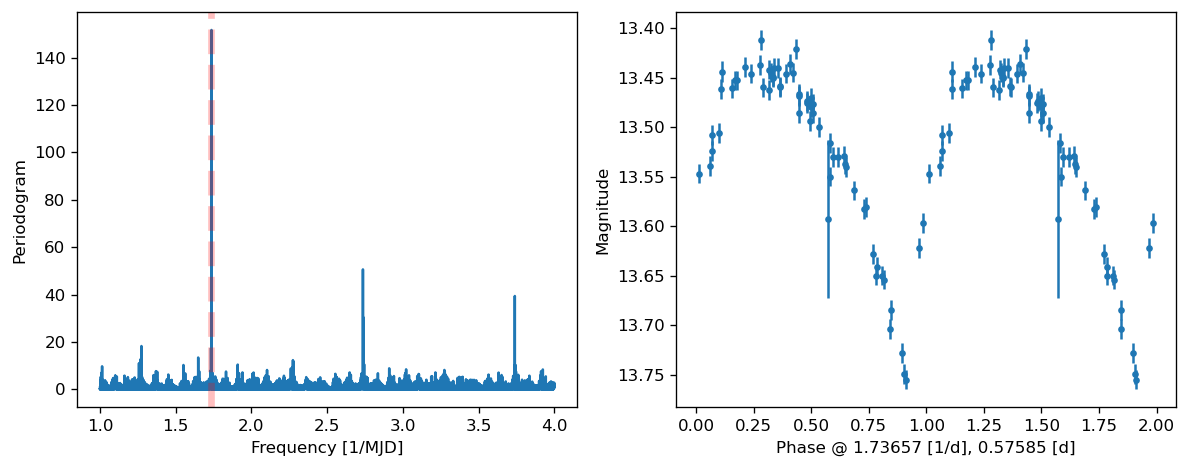

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True, dpi=120)
ax[0].plot(freq, per)
ymin, ymax = ax[0].get_ylim()
ax[0].plot([fbest[0], fbest[0]], [ymin, ymax], 'r--', linewidth=4, alpha=0.25)
ax[0].set_ylim([ymin, ymax])
ax[0].set_xlabel('Frequency [1/MJD]')
ax[0].set_ylabel('Periodogram')
plt.grid()

f_fold = fbest[0]
phase = np.mod(mjd, 1.0/f_fold)*f_fold
I = np.argsort(phase)
ax[1].errorbar(np.concatenate([np.sort(phase), np.sort(phase)+1.0]), 
            np.concatenate([mag[I], mag[I]]),
            np.concatenate([err[I], err[I]]), fmt='.')

ax[1].invert_yaxis()
ax[1].set_xlabel('Phase @ %0.5f [1/d], %0.5f [d]' %(f_fold, 1.0/f_fold))
ax[1].set_ylabel('Magnitude')
plt.grid()